In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

import numpy as np

from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# pip install git+https://github.com/DrGFreeman/rps-cv.git
# pip install scikit-image
# download images from github and store in local ./img folder

from rpscv import imgproc


# Generating greyscale images
X, y = imgproc.generateGrayFeatures()

Completed processing 2188 images


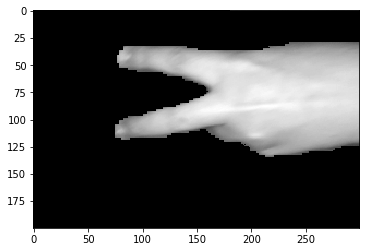

In [4]:
# Validateing images imported

# Size shoulde be ((2188, 60000), (2188,))
X.shape, y.shape

# This should display the 'Rock, Paper Scissor' greyscale images
import matplotlib.pyplot as plt

plt.imshow(X[1508].reshape(200,300),cmap='gray')
plt.show()

X = X.reshape([-1, 200, 300, 1])

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[200, 300, 1]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
y_binary = to_categorical(y)

In [12]:
model.compile(tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y_binary, validation_split=0.10, batch_size=64, epochs=10, verbose=2)

Train on 1969 samples, validate on 219 samples
Epoch 1/10


In [6]:
X.shape

(2188, 60000)

In [7]:
Ximg = X.reshape([-1, 200, 300, 1])

In [10]:
Ximg[0][100][0]

array([0.], dtype=float32)